In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install category_encoders

In [0]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import preprocessing, model_selection, linear_model
import sklearn
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from category_encoders import target_encoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [0]:
#Reading training dataset
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML group assignment/tcd-ml-1920-group-income-train.csv")
print (dataset.head())
print ("dataset.shape: ",dataset.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


   Instance  ...  Total Yearly Income [EUR]
0         1  ...                    6182.05
1         2  ...                    6819.69
2         3  ...                    8663.53
3         4  ...                    2400.64
4         5  ...                    2816.18

[5 rows x 17 columns]
dataset.shape:  (1048574, 17)


In [0]:
#Reading prediction dataset
pred_dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML group assignment/tcd-ml-1920-group-income-test.csv")
print (pred_dataset.head())
print ("pred_dataset.shape: ", pred_dataset.shape)

   Instance  ...  Total Yearly Income [EUR]
0         1  ...                        NaN
1         2  ...                        NaN
2         3  ...                        NaN
3         4  ...                        NaN
4         5  ...                        NaN

[5 rows x 17 columns]
pred_dataset.shape:  (369438, 17)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Fetching string values from 'Yearly Income in addition to Salary (e.g. Rental Income)'
df = []
df=dataset['Yearly Income in addition to Salary (e.g. Rental Income)'].str.split(n=1, expand=True)
dataset['Yearly Income in addition to Salary (e.g. Rental Income)']=pd.to_numeric(df[0],errors='coerce')

df=pred_dataset['Yearly Income in addition to Salary (e.g. Rental Income)'].str.split(n=1,expand=True)
pred_dataset['Yearly Income in addition to Salary (e.g. Rental Income)']=pd.to_numeric(df[0],errors='coerce')

dataset['Work Experience in Current Job [years]']=pd.to_numeric(dataset['Work Experience in Current Job [years]'],errors='coerce')
pred_dataset['Work Experience in Current Job [years]']=pd.to_numeric(pred_dataset['Work Experience in Current Job [years]'],errors='coerce')
# print (pred_dataset.dtypes)
# print (pred_dataset['Yearly Income in addition to Salary (e.g. Rental Income)'].head())

In [0]:
#Managing NAN values 

#dataset.dropna(inplace=True)
dataset['Year of Record'].fillna(method='pad', inplace=True)
dataset['Housing Situation'].fillna('nA', inplace=True)
dataset['Crime Level in the City of Employement'].fillna(method='pad', inplace=True)
dataset['Work Experience in Current Job [years]'].fillna(dataset['Work Experience in Current Job [years]'].mean(), inplace=True)
dataset['Satisfation with employer'].fillna('Average', inplace=True)
dataset['Gender'].fillna('unknown', inplace=True)
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Country'].fillna('unknown', inplace=True)
dataset['Size of City'].fillna(method='pad', inplace=True)
dataset['Profession'].fillna('#N/A', inplace=True)
dataset['University Degree'].fillna('No', inplace=True)
dataset['Wears Glasses'].fillna(0,inplace=True)
dataset['Hair Color'].fillna('Unknown', inplace=True)
dataset['Body Height [cm]'].fillna(dataset['Body Height [cm]'].mean(), inplace=True)
dataset['Yearly Income in addition to Salary (e.g. Rental Income)'].fillna('0', inplace=True)
# dataset.to_csv('/content/drive/My Drive/Colab Notebooks/ML group assignment/dataset_withoutNAN.csv', index=False)

In [0]:
#pred_dataset.dropna(inplace=True)
pred_dataset['Year of Record'].fillna(method='pad', inplace=True)
pred_dataset['Housing Situation'].fillna('nA', inplace=True)
pred_dataset['Crime Level in the City of Employement'].fillna(method='pad', inplace=True)
pred_dataset['Work Experience in Current Job [years]'].fillna(pred_dataset['Work Experience in Current Job [years]'].mean(), inplace=True)
pred_dataset['Satisfation with employer'].fillna('Average', inplace=True)
pred_dataset['Gender'].fillna('unknown', inplace=True)
pred_dataset['Age'].fillna(pred_dataset['Age'].mean(), inplace=True)
pred_dataset['Country'].fillna('unknown', inplace=True)
pred_dataset['Size of City'].fillna(method='pad', inplace=True)
pred_dataset['Profession'].fillna('#N/A', inplace=True)
pred_dataset['University Degree'].fillna('No', inplace=True)
pred_dataset['Wears Glasses'].fillna(0,inplace=True)
pred_dataset['Hair Color'].fillna('Unknown', inplace=True)
pred_dataset['Body Height [cm]'].fillna(pred_dataset['Body Height [cm]'].mean(), inplace=True)
pred_dataset['Yearly Income in addition to Salary (e.g. Rental Income)'].fillna('0', inplace=True)
# pred_dataset.to_csv('/content/drive/My Drive/Colab Notebooks/ML group assignment/pred_dataset_withoutNAN.csv', index=False)

In [0]:
# dataset.dtypes

In [0]:
# dataset['Housing Situation'].replace('0', 'nA', inplace=True)
# dataset['Housing Situation'].replace(0, 'nA', inplace=True)
dataset['Housing Situation'].replace('0', 'nA', inplace=True)
dataset['Housing Situation'].replace(0, 'nA', inplace=True)
dataset['Work Experience in Current Job [years]'].replace('#NUM!', dataset['Work Experience in Current Job [years]'].mean(), inplace=True)
dataset['Gender'].replace('0', 'unknown', inplace=True)
dataset['Gender'].replace('f', 'female', inplace=True)
dataset['Country'].replace('0', 'unknown', inplace=True)
dataset['University Degree'].replace('0', 'No', inplace=True)
dataset['Hair Color'].replace('0', 'Unknown', inplace=True)
# dataset.to_csv('/content/drive/My Drive/Colab Notebooks/ML group assignment/dataset_valuesReplaced.csv', index=False)

In [0]:
pred_dataset['Housing Situation'].replace('0', 'nA', inplace=True)
pred_dataset['Housing Situation'].replace(0, 'nA', inplace=True)
pred_dataset['Work Experience in Current Job [years]'].replace('#NUM!', pred_dataset['Work Experience in Current Job [years]'].mean(), inplace=True)
pred_dataset['Gender'].replace('0', 'unknown', inplace=True)
pred_dataset['Gender'].replace('f', 'female', inplace=True)
pred_dataset['Country'].replace('0', 'unknown', inplace=True)
pred_dataset['University Degree'].replace('0', 'No', inplace=True)
pred_dataset['Hair Color'].replace('0', 'Unknown', inplace=True)
# pred_dataset.to_csv('/content/drive/My Drive/Colab Notebooks/ML group assignment/pred_dataset_valuesReplaced.csv', index=False)

In [0]:
print ("dataset unique values: ", dataset['Housing Situation'].unique())
print ("pred_dataset unique values: ", pred_dataset['Housing Situation'].unique())

dataset unique values:  ['nA' 'Castle' 'Large House' 'Medium House' 'Small House'
 'Large Apartment' 'Medium Apartment' 'Small Apartment']
pred_dataset unique values:  ['Small House' 'Castle' 'Large House' 'Large Apartment' 'nA'
 'Medium Apartment' 'Medium House' 'Small Apartment']


In [0]:
# dataset.to_csv('/content/drive/My Drive/Colab Notebooks/ML group assignment/dataset_valuesReplaced.csv', index=False)

In [0]:
# print (dataset['Housing Situation'])

Text(0.5, 0, 'Yearly Income in addition to Salary (e.g. Rental Income)')

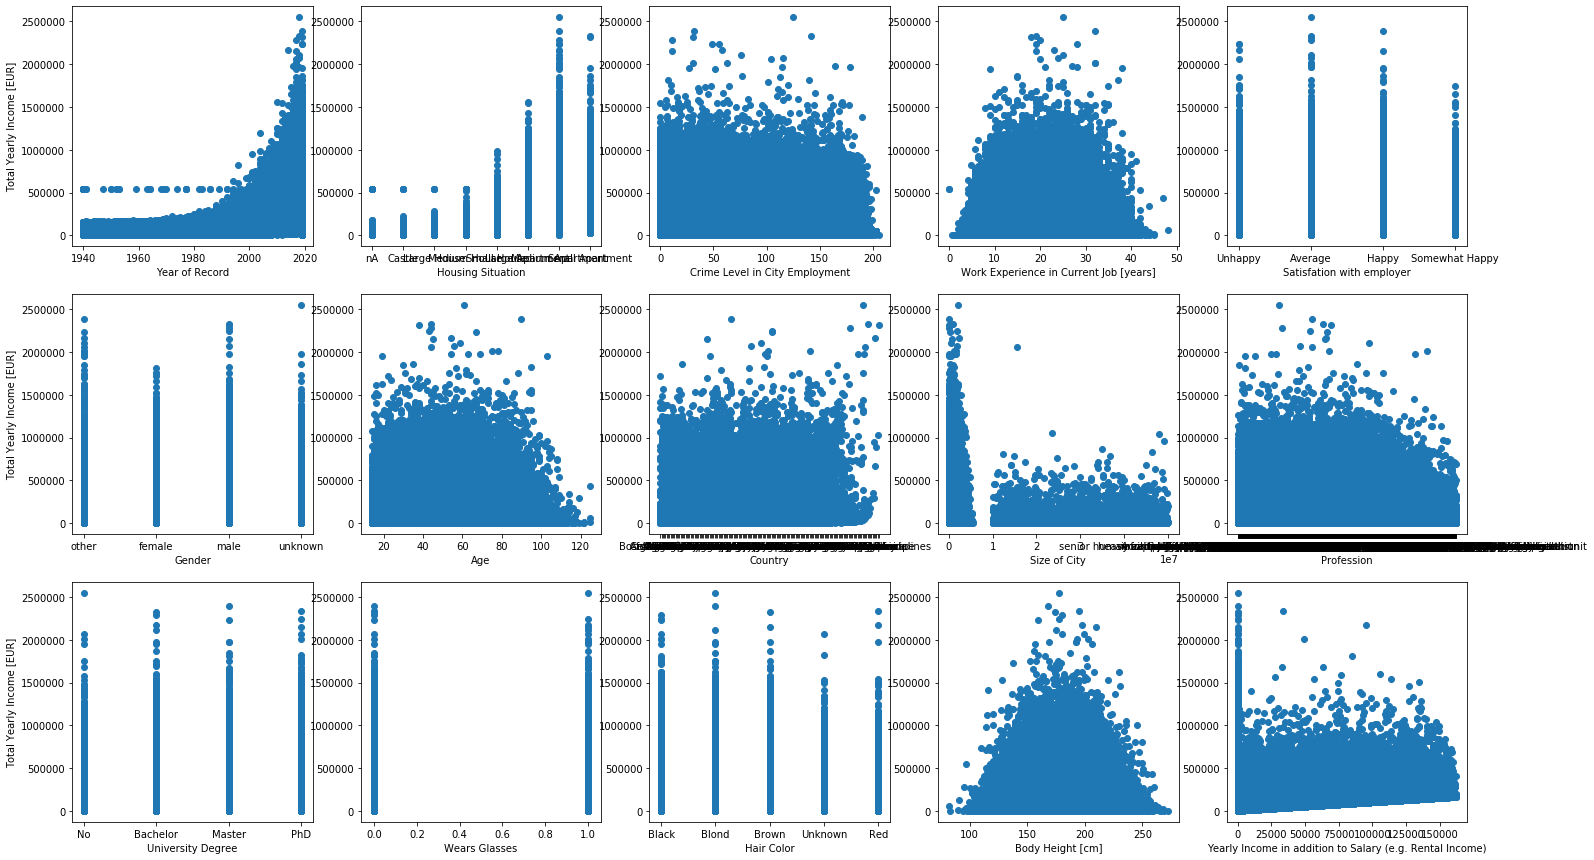

In [0]:
#Plotting the features

f, ax = plt.subplots(3,5, figsize=(25,15))
ax[0,0].scatter(dataset['Year of Record'], dataset['Total Yearly Income [EUR]'])
ax[0,0].set_xlabel('Year of Record')
ax[0,0].set_ylabel('Total Yearly Income [EUR]')

ax[0,1].scatter(dataset['Housing Situation'], dataset['Total Yearly Income [EUR]'])
ax[0,1].set_xlabel('Housing Situation')
# ax[0,1].set_ylabel('Total Yearly Income [EUR]')

ax[0,2].scatter(dataset['Crime Level in the City of Employement'], dataset['Total Yearly Income [EUR]'])
ax[0,2].set_xlabel('Crime Level in City Employment')
# ax[0,2].set_ylabel('Total Yearly Income [EUR]')

ax[0,3].scatter(dataset['Work Experience in Current Job [years]'], dataset['Total Yearly Income [EUR]'])
ax[0,3].set_xlabel('Work Experience in Current Job [years]')
# ax[0,3].set_ylabel('Total Yearly Income [EUR]')

ax[0,4].scatter(dataset['Satisfation with employer'], dataset['Total Yearly Income [EUR]'])
ax[0,4].set_xlabel('Satisfation with employer')
# ax[0,4].set_ylabel('Total Yearly Income [EUR]')

ax[1,0].scatter(dataset['Gender'], dataset['Total Yearly Income [EUR]'])
ax[1,0].set_xlabel('Gender')
ax[1,0].set_ylabel('Total Yearly Income [EUR]')

ax[1,1].scatter(dataset['Age'], dataset['Total Yearly Income [EUR]'])
ax[1,1].set_xlabel('Age')
# ax[1,1].set_ylabel('Total Yearly Income [EUR]')

ax[1,2].scatter(dataset['Country'], dataset['Total Yearly Income [EUR]'])
ax[1,2].set_xlabel('Country')
# ax[1,2].set_ylabel('Total Yearly Income [EUR]')

ax[1,3].scatter(dataset['Size of City'], dataset['Total Yearly Income [EUR]'])
ax[1,3].set_xlabel('Size of City')
# ax[1,3].set_ylabel('Total Yearly Income [EUR]')

ax[1,4].scatter(dataset['Profession'], dataset['Total Yearly Income [EUR]'])
ax[1,4].set_xlabel('Profession')
# ax[1,4].set_ylabel('Total Yearly Income [EUR]')

ax[2,0].scatter(dataset['University Degree'], dataset['Total Yearly Income [EUR]'])
ax[2,0].set_xlabel('University Degree')
ax[2,0].set_ylabel('Total Yearly Income [EUR]')

ax[2,1].scatter(dataset['Wears Glasses'], dataset['Total Yearly Income [EUR]'])
ax[2,1].set_xlabel('Wears Glasses')
# ax[2,1].set_ylabel('Total Yearly Income [EUR]')

ax[2,2].scatter(dataset['Hair Color'], dataset['Total Yearly Income [EUR]'])
ax[2,2].set_xlabel('Hair Color')
# ax[2,2].set_ylabel('Total Yearly Income [EUR]')

ax[2,3].scatter(dataset['Body Height [cm]'], dataset['Total Yearly Income [EUR]'])
ax[2,3].set_xlabel('Body Height [cm]')
# ax[2,3].set_ylabel('Total Yearly Income [EUR]')

ax[2,4].scatter(dataset['Yearly Income in addition to Salary (e.g. Rental Income)'], dataset['Total Yearly Income [EUR]'])
ax[2,4].set_xlabel('Yearly Income in addition to Salary (e.g. Rental Income)')
# ax[2,4].set_ylabel('Total Yearly Income [EUR]')

In [0]:
#Selecting features from training dataset
dataset=dataset.drop(['Wears Glasses' , 'Hair Color'], axis = 1)
#dataset.to_csv('dataset.csv', index=False)
print (dataset.head())
print (dataset.shape)

   Instance  ...  Total Yearly Income [EUR]
0         1  ...                    6182.05
1         2  ...                    6819.69
2         3  ...                    8663.53
3         4  ...                    2400.64
4         5  ...                    2816.18

[5 rows x 15 columns]
(1048574, 15)


In [0]:
#Selecting features from prediction dataset
pred_dataset= pred_dataset.drop(['Wears Glasses' , 'Hair Color'], axis = 1)
print (pred_dataset.head())
print ("pred_dataset.shape: ", pred_dataset.shape)

   Instance  ...  Total Yearly Income [EUR]
0         1  ...                        NaN
1         2  ...                        NaN
2         3  ...                        NaN
3         4  ...                        NaN
4         5  ...                        NaN

[5 rows x 15 columns]
pred_dataset.shape:  (369438, 15)


In [0]:
#Removing outliers
dataset = dataset[dataset['Total Yearly Income [EUR]'] < 2500000]
dataset = dataset[dataset['Total Yearly Income [EUR]'] >= 0]
print ("dataset.shape: ", dataset.shape)

dataset.shape:  (1048573, 15)


In [0]:
# dataset['Total Yearly Income [EUR]'] = dataset['Total Yearly Income [EUR]'].apply(np.log)

In [0]:
# Splitting the dataset into features and y
y = np.array(dataset['Total Yearly Income [EUR]'])
dataset = dataset.drop(['Instance','Total Yearly Income [EUR]'], axis=1)
x_pred = pred_dataset.drop(['Instance','Total Yearly Income [EUR]'], axis=1)
print ("y : ", y)
print (dataset.head())
print ("x_pred : ", x_pred.head())

y :  [  6182.05   6819.69   8663.53 ... 254738.53  11182.98   1280.21]
   Year of Record  ... Yearly Income in addition to Salary (e.g. Rental Income)
0          1940.0  ...                                                0.0      
1          1940.0  ...                                                0.0      
2          1940.0  ...                                                0.0      
3          1940.0  ...                                                0.0      
4          1940.0  ...                                                0.0      

[5 rows x 13 columns]
x_pred :     Year of Record  ... Yearly Income in addition to Salary (e.g. Rental Income)
0          1994.0  ...                                                0.0      
1          1964.0  ...                                                0.0      
2          1974.0  ...                                                0.0      
3          1997.0  ...                                                0.0      
4          1949.

In [0]:
#Splitting the data into training and prediction sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(dataset,y,test_size = 0.2)
# y_train = y_train.apply(np.log)
y_train = np.log(y_train)
# y = y.apply(np.log)
y = np.log(y)
print ("x_train : ", x_train.head())
print ("x_test : ", x_test.head())
print ("y_train : ", y_train)
print ("y_test : ", y_test)


x_train :          Year of Record  ... Yearly Income in addition to Salary (e.g. Rental Income)
656251          1988.0  ...                                               0.00      
96881           1947.0  ...                                               0.00      
244524          1959.0  ...                                               0.00      
376199          1970.0  ...                                           72042.59      
389312          1971.0  ...                                               0.00      

[5 rows x 13 columns]
x_test :          Year of Record  ... Yearly Income in addition to Salary (e.g. Rental Income)
430924          1974.0  ...                                          129578.68      
549092          1980.0  ...                                           70307.73      
157383          1952.0  ...                                               0.00      
558106          1980.0  ...                                               0.00      
974233          2014.

In [0]:
#Handling categorical features using target encoder
te = target_encoder.TargetEncoder(return_df=False)
x = te.fit_transform(dataset, y)
x_pred = te.transform(x_pred)

te_test = target_encoder.TargetEncoder(return_df=False)
x_train = te_test.fit_transform(x_train, y_train)
x_test = te_test.transform(x_test)

# dv_x_test = DictVectorizer(sparse=False)
# x_train = dv_x_test.fit_transform(x_train.to_dict(orient='record'))
# x_test = dv_x_test.transform(x_test.to_dict(orient='record'))
print ("x_train : ", x_train)
print ("x_test : ", x_test)
print ("y_train : ", y_train)
print ("y_test : ", y_test)
print (x_train.shape)

x_train :  [[1.98800000e+03 1.02667838e+01 3.00000000e+01 ... 1.00521030e+01
  2.22000000e+02 0.00000000e+00]
 [1.94700000e+03 8.01080408e+00 8.60000000e+01 ... 9.75952888e+00
  1.58000000e+02 0.00000000e+00]
 [1.95900000e+03 8.01080408e+00 3.10000000e+01 ... 1.00521030e+01
  1.98000000e+02 0.00000000e+00]
 ...
 [1.97000000e+03 9.68361236e+00 9.00000000e+00 ... 1.00521030e+01
  2.02000000e+02 0.00000000e+00]
 [1.98000000e+03 9.68361236e+00 1.09000000e+02 ... 9.92424079e+00
  1.57000000e+02 9.19775200e+04]
 [1.96600000e+03 8.99261381e+00 1.06000000e+02 ... 9.92424079e+00
  1.53000000e+02 0.00000000e+00]]
x_test :  [[1.97400000e+03 9.68361236e+00 9.10000000e+01 ... 9.92424079e+00
  1.85000000e+02 1.29578680e+05]
 [1.98000000e+03 9.68361236e+00 1.68000000e+02 ... 9.92424079e+00
  1.50000000e+02 7.03077300e+04]
 [1.95200000e+03 8.01080408e+00 1.44000000e+02 ... 1.00521030e+01
  1.96000000e+02 0.00000000e+00]
 ...
 [1.97700000e+03 9.68361236e+00 1.01000000e+02 ... 9.92424079e+00
  1.7100000

In [0]:
print ("x_train : ", x_train)
print ("x_test : ", x_test)
print ("y_train : ", y_train)
print ("y_test : ", y_test)
print (x_train.shape)

x_train :  [[1.98800000e+03 1.02667838e+01 3.00000000e+01 ... 1.00521030e+01
  2.22000000e+02 0.00000000e+00]
 [1.94700000e+03 8.01080408e+00 8.60000000e+01 ... 9.75952888e+00
  1.58000000e+02 0.00000000e+00]
 [1.95900000e+03 8.01080408e+00 3.10000000e+01 ... 1.00521030e+01
  1.98000000e+02 0.00000000e+00]
 ...
 [1.97000000e+03 9.68361236e+00 9.00000000e+00 ... 1.00521030e+01
  2.02000000e+02 0.00000000e+00]
 [1.98000000e+03 9.68361236e+00 1.09000000e+02 ... 9.92424079e+00
  1.57000000e+02 9.19775200e+04]
 [1.96600000e+03 8.99261381e+00 1.06000000e+02 ... 9.92424079e+00
  1.53000000e+02 0.00000000e+00]]
x_test :  [[1.97400000e+03 9.68361236e+00 9.10000000e+01 ... 9.92424079e+00
  1.85000000e+02 1.29578680e+05]
 [1.98000000e+03 9.68361236e+00 1.68000000e+02 ... 9.92424079e+00
  1.50000000e+02 7.03077300e+04]
 [1.95200000e+03 8.01080408e+00 1.44000000e+02 ... 1.00521030e+01
  1.96000000e+02 0.00000000e+00]
 ...
 [1.97700000e+03 9.68361236e+00 1.01000000e+02 ... 9.92424079e+00
  1.7100000

In [0]:
#Scaling the feature set
#print ("Scaling")
scaler = preprocessing.StandardScaler(copy=False)
x = scaler.fit_transform(x)
x_pred = scaler.transform(x_pred)
#X = preprocessing.scale(X, copy=False)
#X_pred = preprocessing.scale(X_pred, copy=False)
#print ("X : ", X)
#print ("X_pred : ", X_pred)

scaler_test = preprocessing.StandardScaler(copy=False)
x_train = scaler_test.fit_transform(x_train)
x_test = scaler_test.transform(x_test)
# x_train = preprocessing.scale(x_train, copy=False)
# x_test = preprocessing.scale(x_test, copy=False)
#np.savetxt("X_scale.csv", X, delimiter=",")
print ("x_train : ", x_train)
print ("x_test : ", x_test)



x_train :  [[ 0.37312717  0.23751322 -1.06958068 ...  1.03488766  2.35014019
  -0.27630684]
 [-1.446065   -1.29656952  0.04956229 ... -1.21461038 -0.86099565
  -0.27630684]
 [-0.91361851 -1.29656952 -1.04959599 ...  1.03488766  1.14596425
  -0.27630684]
 ...
 [-0.42554256 -0.15904766 -1.4892593  ...  1.03488766  1.34666024
  -0.27630684]
 [ 0.01816284 -0.15904766  0.50921029 ...  0.05180093 -0.91116965
   3.57317472]
 [-0.60302473 -0.62893173  0.44925621 ...  0.05180093 -1.11186564
  -0.27630684]]
x_test :  [[-0.2480604  -0.15904766  0.14948577 ...  0.05180093  0.49370228
   5.14687417]
 [ 0.01816284 -0.15904766  1.68830735 ...  0.05180093 -1.26238763
   2.66624163]
 [-1.2242123  -1.29656952  1.20867465 ...  1.03488766  1.04561626
  -0.27630684]
 ...
 [-0.11494878 -0.15904766  0.34933273 ...  0.05180093 -0.20873368
  -0.27630684]
 [ 0.28438609  0.23751322 -1.54921339 ...  1.03488766  1.34666024
  -0.27630684]
 [ 0.68372095  0.74063867 -1.24944295 ...  0.05180093 -0.66029966
  -0.276306

In [0]:
# x_train.to_csv('x_train.csv', index=False)

In [0]:
# isNAN = np.isnan(x_train)

In [0]:
# np.any(np.isnan(x_train))

In [0]:
# for i in range(isNAN.shape[0]):
#   for j in range(isNAN.shape[1]):
#     if (isNAN[i][j] == 1):
#       print ("x_train[",i,"][",j,"] = ", x_train[i][j])

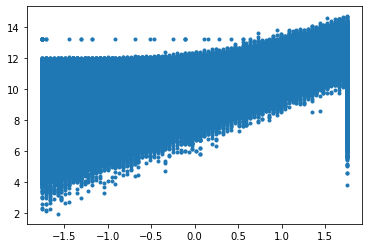

In [0]:
plt.plot(x_train[:,0], y_train, '.');

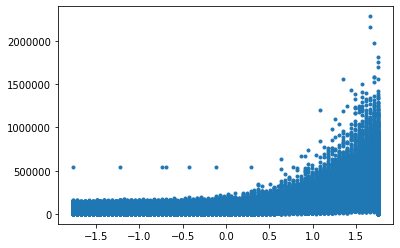

In [0]:
plt.plot(x_test[:,0], y_test, '.');

In [0]:
# Training the data for testing

clf = GradientBoostingRegressor(learning_rate = 0.09, n_estimators = 1200)
# clf = linear_model.LinearRegression()
# clf = GradientBoostingRegressor()
# clf = linear_model.SGDRegressor()
# clf =  linear_model.Lasso()
# clf =  linear_model.Ridge()
# clf = RandomForestRegressor()# n_estimators = 500
# clf = linear_model.LinearRegression()
# clf = MLPRegressor(random_state=0,activation='relu', hidden_layer_sizes=16)
# clf = linear_model.SGDRegressor()
clf.fit(x_train, y_train)
y_pred_test = clf.predict(x_test)
print ("y_pred_test : " , y_pred_test)
y_pred_test = np.exp(y_pred_test)
print ("y_pred_test : " , y_pred_test)

y_pred_test :  [11.63057783 11.42770085  7.2811602  ...  7.98595733 10.1383286
 10.20275899]
y_pred_test :  [112485.30058184  91830.59952658   1452.67244184 ...   2939.3899312
  25294.15443741  26977.51419783]


rmse:  27198.927568
MAE:  10745.947266


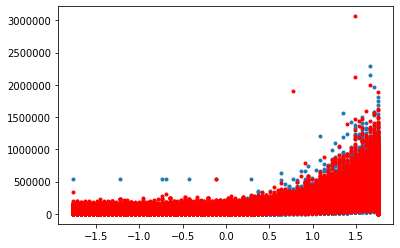

In [0]:
plt.plot(x_test[:,0], y_test, '.')
plt.plot(x_test[:,0], y_pred_test, 'r.')
mse = mean_squared_error(y_test,y_pred_test) 
rmse = np.sqrt(mse)
print ("rmse: ", '{0:f}'.format(rmse))
mae = metrics.mean_absolute_error(y_test,y_pred_test)
print ("MAE: ", '{0:f}'.format(mae))

In [0]:
classifier = GradientBoostingRegressor(learning_rate = 0.09, n_estimators = 1200)
# #classifier =  linear_model.Lasso()
# #classifier =  linear_model.Ridge()
# # #classifier = RandomForestRegressor(n_estimators = 500)
# classifier = MLPRegressor(random_state=0,activation='relu', hidden_layer_sizes=16)
classifier.fit(x,y)

In [0]:
y_pred = classifier.predict(x_pred)
# print ("y_pred: ", y_pred)

In [0]:
#printing the outcome to the csv file
y_pred=np.exp(y_pred)
pred_dataset['Total Yearly Income [EUR]'] = y_pred
pred_dataset = pred_dataset.drop(['Year of Record','Housing Situation','Crime Level in the City of Employement','Work Experience in Current Job [years]','Satisfation with employer', 'Gender','Age','Country', 'Size of City', 'Profession', 'University Degree','Yearly Income in addition to Salary (e.g. Rental Income)','Body Height [cm]'], axis=1)
# #print (pred_dataset.head())
pred_dataset.to_csv('/content/drive/My Drive/Colab Notebooks/ML group assignment/tcd-ml-1920-group-income-submission.csv', index=False)